In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def DrawLine(x0, y0, x1, y1, clr, vp):
    steep = abs(y1 - y0) > abs(x1 - x0) # Крутизна
    if steep: # Обмен X, Y, если угол наклона отрезка более 45º
        x0, y0 = y0, x0
        x1, y1 = y1, x1
    if x0 > x1: # Приводим к базовой форме алгоритма, в которой x0 < x1
        x0, x1 = x1, x0
        y0, y1 = y1, y0
    dx = x1 - x0
    dy = abs(y1 - y0)
    dx2 = 2 * dx
    dy2 = 2 * dy
    d = -dx
    y_step = 1 if y0 < y1 else -1 # Шаг по Y
    y = y0
    x = x0
    while x <= x1:
        if steep: # Помним о перестановках
            xp, yp = y, x
        else:
            xp, yp = x, y
        vp[yp, xp - 1 : xp + 2] = clr # 3 пиксела
        d = d + dy2
        if d > 0:
            y = y + y_step
            d = d - dx2
        x = x + 1

In [3]:
def findN(ang, a, b): # функция находит нормаль к плоскости
    x = np.cos((ang * np.pi) / 180) * a
    vec_1 = np.array([x, 0, np.sin((ang * np.pi) / 180) * a])
    vec_2 = np.array([0, b, 0]) 
    N = np.cross(vec_1, vec_2)
    return x, N

In [4]:
def findZP(coord, v, N): # вычисление глубины
    return v[2] - (N[0] * (coord[0] - v[0]) + N[1] * (coord[1] - v[1])) / N[2]

In [5]:
def Draw(v, clr, ang, a, b, vp, z_buffer): # с буфером глубины
    x, N = findN(ang, a, b)
    x = int(x)
    for i in range(v[0], v[0] + x):
        for j in range(v[1] - b, v[1]):
            zXY = z_buffer[i, j]
            zP = findZP([i, j], v, N) # Функция, возвращающая глубину точки P
            if zP > zXY:
                z_buffer[i, j] = zP
                vp[i, j] = clr #(clr)

In [11]:
wx, wy = 180, 135
vp = np.full((wx, wy, 3), 255, dtype='uint8')
z_buffer = np.full((wx, wy), -np.inf)
# clr0 = [255, 0, 0], v0 = (35, 10, 0); ang0 = 0; a0 = int(0.6 * wx); b0 = int(0.8 * wy)
Draw((35, 10, 0), [255, 0, 0], 0, int(0.6 * wx), int(0.8 * wy), vp, z_buffer)
# clr1 = [0, 255, 0], v1 = (10, 20, -50); ang1 = 45; a1 = int(0.8 * wx); b1 = int(0.6 * wy);
Draw((10, 20, -50), [0, 255, 0], 45, int(0.8 * wx), int(0.6 * wy), vp, z_buffer)
# clr2 = [0, 0, 255], v2 = (70, 30, 70); ang2 = -50; a2 = int(0.9 * wx); b2 = int(0.4 * wy)
Draw((70, 30, 70), [0, 0, 255], -50, int(0.9 * wx), int(0.4 * wy), vp, z_buffer)

(-0.5, 134.5, 179.5, -0.5)

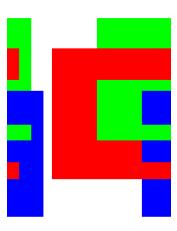

In [12]:
plt.imshow(vp)
plt.axis('off')

In [13]:
def Draw_2(v, clr, ang, a, b, vp): # сцена без учета глубины
    x, _ = findN(ang, a, b)
    x = int(x)
    for i in range(v[0], v[0] + x):
        for j in range(v[1] - b, v[1]):
#             zXY = z_buffer[i, j]
#             zP = findZP([i, j], v, N) # Функция, возвращающая глубину точки P
#             if zP > zXY:
#                 z_buffer[i, j] = zP
#                 vp[i, j] = clr #(clr)
            vp[i, j] = clr

In [14]:
vp_2 = np.full((wx, wy, 3), 255, dtype='uint8')
# clr0 = [255, 0, 0], v0 = (35, 10, 0); ang0 = 0; a0 = int(0.6 * wx); b0 = int(0.8 * wy)
Draw_2((35, 10, 0), [255, 0, 0], 0, int(0.6 * wx), int(0.8 * wy), vp_2)
# clr1 = [0, 255, 0], v1 = (10, 20, -50); ang1 = 45; a1 = int(0.8 * wx); b1 = int(0.6 * wy);
Draw_2((10, 20, -50), [0, 255, 0], 45, int(0.8 * wx), int(0.6 * wy), vp_2)
# clr2 = [0, 0, 255], v2 = (70, 30, 70); ang2 = -50; a2 = int(0.9 * wx); b2 = int(0.4 * wy)
Draw_2((70, 30, 70), [0, 0, 255], -50, int(0.9 * wx), int(0.4 * wy), vp_2)

(-0.5, 134.5, 179.5, -0.5)

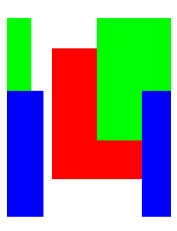

In [15]:
plt.imshow(vp_2)
plt.axis('off')

In [18]:
vp_3 = np.full((wx, wy, 3), 255, dtype='uint8')
DrawLine(35, 0, 35 + int(0.6 * wx), 0, [255, 0, 0], vp_3)
DrawLine(10 + np.cos((45 * np.pi) / 180) * int(0.8 * wx), 50 + np.sin((45 * np.pi) / 180) * int(0.8 * wx), 10, 50, [0, 255, 0], vp_3)
DrawLine(70, 70, int(70 + np.cos((50 * np.pi) / 180) * int(0.9 * wx)), int(70 - np.sin((50 * np.pi) / 180) * int(0.9 * wx)), [0, 0, 255], vp_3)

(-0.5, 134.5, 179.5, -0.5)

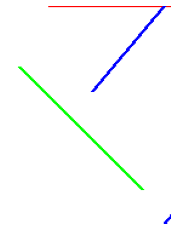

In [19]:
plt.imshow(vp_3)
plt.axis('off')